# Determine the optimal value of lambda for Ridge and Lasso Regression
## Surprise Housing Assignment

##### These are the following steps need to be performed
- Data understanding
- Data Visualisation 
- Data preparation
- Data Modeling and evaluation
- Ridge Regression
- Lasso Regression

## 1.Data understanding
 importing all the required liberaries and reading the data from csv file to further analysis and for understanding

In [1]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Remove unnecessary warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
housingdf=pd.read_csv("C:/Users/Lenovo/Downloads/train.csv")
# Set the max column display as 100
pd.set_option('display.max_columns',100)
# Displaying the first 10 row data
housingdf['GarageArea'] = np.sqrt(housingdf['GarageArea'])
housingdf['SalePrice'] = np.sqrt(housingdf['SalePrice'] +1)
housingdf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,23.409400,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,456.619097
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,21.447611,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,426.029342
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,24.657656,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,472.758924
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,25.337719,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,374.167075
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,28.913665,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,500.001000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,21.908902,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,378.154730
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,25.219040,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,554.076709
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,22.000000,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,447.214714
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,21.633308,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,360.417813
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1

In [4]:
# Shape of the dataframe
print('Shape of housing data dataframe is :')
housingdf.shape

Shape of housing data dataframe is :


(1460, 81)

In [5]:
## Creating a derivied column - "AgeHouse"
## It is the age of the house calculated by YrSold-YearBuilt.
# Age of the house 
housingdf['AgeHouse'] = housingdf['YrSold'] - housingdf['YearBuilt']
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHouse
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,23.409400,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,456.619097,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,21.447611,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,426.029342,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,24.657656,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,472.758924,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,25.337719,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,374.167075,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,28.913665,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,500.001000,8


In [6]:
##YrSold and YearBuilt columns. As we calculated the age of the house, so we do not need these columns anymore in our analysis.
##YearRemodAdd, GarageYrBlt and MoSold columns - As these columns will not be such useful while doing our analysis
# Removing columns
housingdf.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [7]:
## Converting numeric to categorical column
## OverallQual, OverallCond and MSSubClass are categorical column but in the original dataset the types of these columns are numeric. Hence converting these columns to categorical.
housingdf['MSSubClass'] = housingdf['MSSubClass'].astype('object')
housingdf['OverallQual'] = housingdf['OverallQual'].astype('object')
housingdf['OverallCond'] = housingdf['OverallCond'].astype('object')

In [8]:
# info of the dataframe
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

### Replacing few NA values to relevant names

In [9]:
housingdf['Alley'] = housingdf['Alley'].replace(np.nan, 'No Alley')
housingdf['BsmtQual'] = housingdf['BsmtQual'].replace(np.nan, 'No Basement')
housingdf['BsmtCond'] = housingdf['BsmtCond'].replace(np.nan, 'No Basement')
housingdf['BsmtExposure'] = housingdf['BsmtExposure'].replace(np.nan, 'No Basement')
housingdf['BsmtFinType1'] = housingdf['BsmtFinType1'].replace(np.nan, 'No Basement')
housingdf['BsmtFinType2'] = housingdf['BsmtFinType2'].replace(np.nan, 'No Basement')
housingdf['FireplaceQu'] = housingdf['FireplaceQu'].replace(np.nan, 'No Fireplace')
housingdf['GarageType'] = housingdf['GarageType'].replace(np.nan, 'No Garage')
housingdf['GarageFinish'] = housingdf['GarageFinish'].replace(np.nan, 'No Garage')
housingdf['GarageQual'] = housingdf['GarageQual'].replace(np.nan, 'No Garage')
housingdf['GarageCond'] = housingdf['GarageCond'].replace(np.nan, 'No Garage')
housingdf['PoolQC'] = housingdf['PoolQC'].replace(np.nan, 'No Pool')
housingdf['Fence'] = housingdf['Fence'].replace(np.nan, 'No Fence')
housingdf['MiscFeature'] = housingdf['MiscFeature'].replace(np.nan, 'No MiscFeature')

In [10]:
## Checking percentage of missing values in columns
(round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07
KitchenAbvGr,0.00
...,...
Foundation,0.00
ExterCond,0.00
ExterQual,0.00
Exterior2nd,0.00


In [11]:
# Imputing missing values of LotFrontage with median
housingdf.loc[np.isnan(housingdf['LotFrontage']), 'LotFrontage'] = housingdf['LotFrontage'].median()

In [12]:
# Deleting the rows for missing values in MasVnrArea
housingdf = housingdf[~np.isnan(housingdf['MasVnrArea'])]

In [13]:
# Let us check the count for values in Electrical 
housingdf['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
# Imputing Electrical column missing values with SBrkr
housingdf.loc[pd.isnull(housingdf['Electrical']), ['Electrical']] = 'SBrkr'

In [15]:
# Display the null data percentage in each column
# Lets again check the percentage of missing values in columns
(round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)


,Nulls
Id,0.0
BedroomAbvGr,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
...,...
ExterQual,0.0
MasVnrArea,0.0
MasVnrType,0.0
Exterior2nd,0.0


In [16]:
#Display the percentage of missing values in the columns
df_missing = (round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)
print(df_missing)

              Nulls
Id              0.0
BedroomAbvGr    0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
...             ...
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
AgeHouse        0.0

[77 rows x 1 columns]


In [17]:
# Numeric columns list
numeric_cols = list(housingdf.select_dtypes(include=['int64', 'float64']).columns)
# Removing "Id" column
numeric_cols.remove('Id')
print(numeric_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHouse']


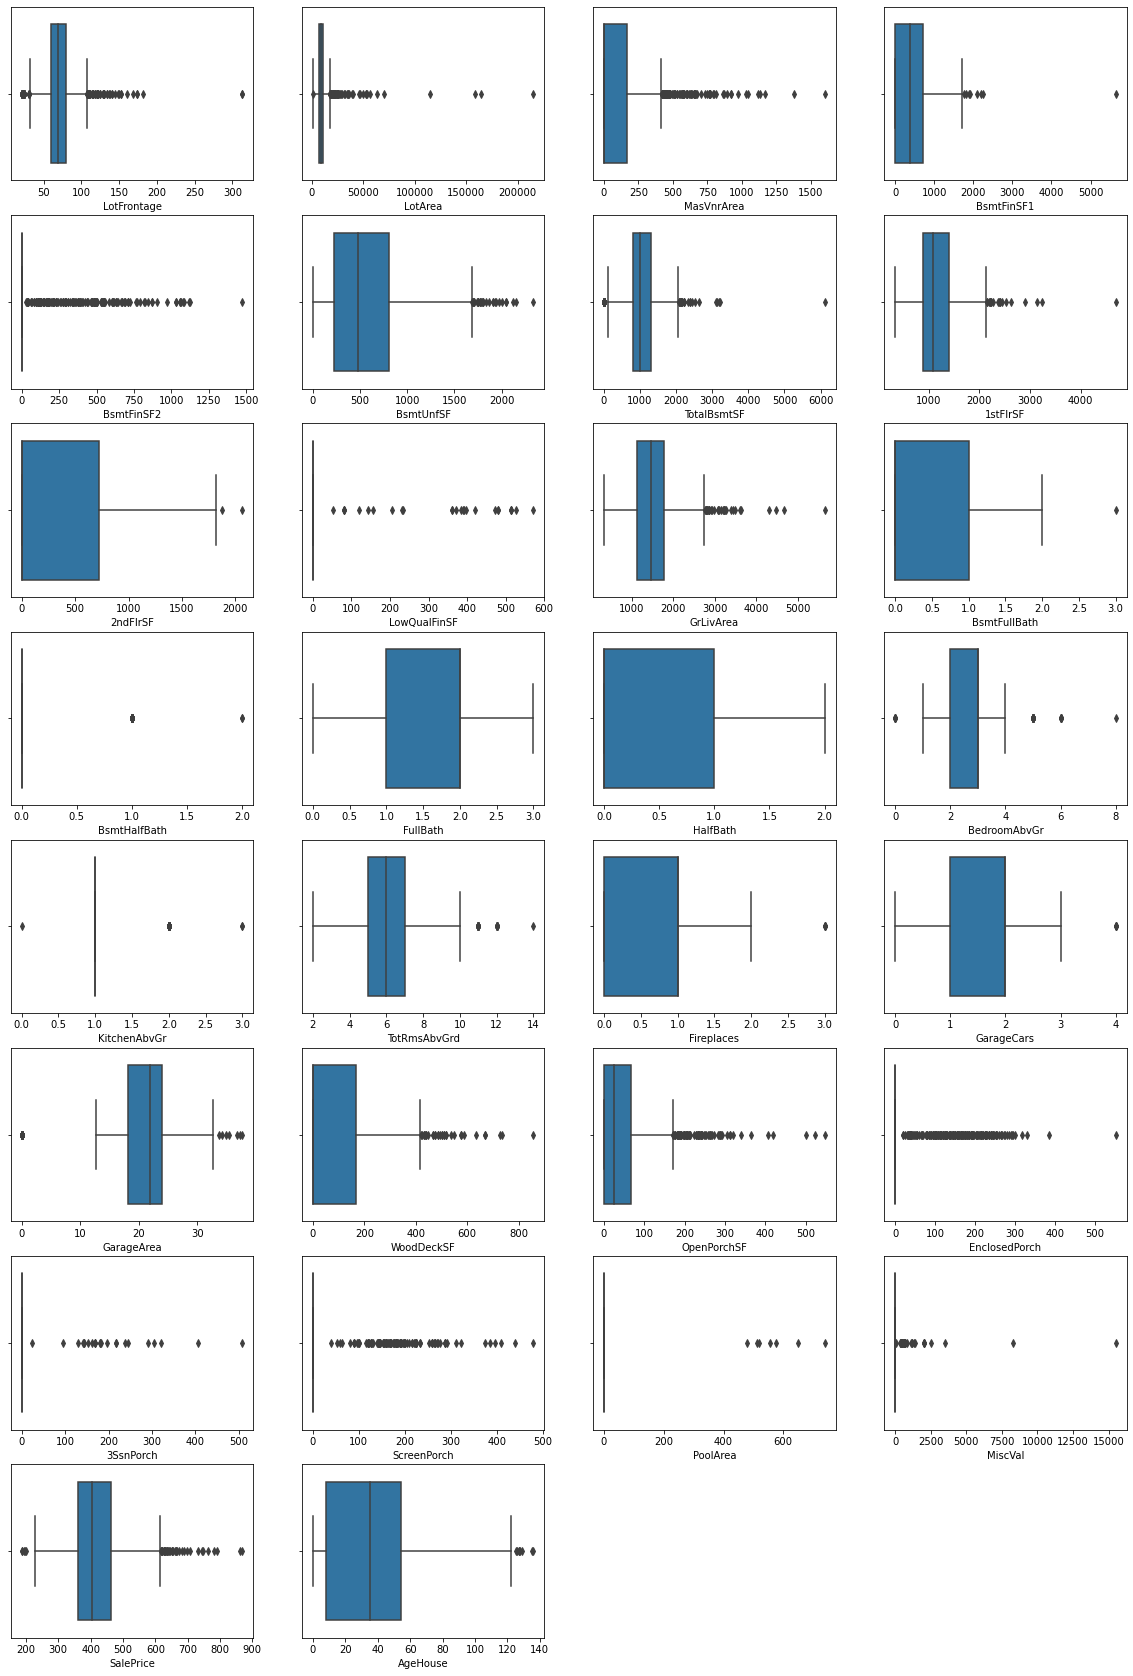

In [18]:
# Plotting the spread of the numeric columns
# Checking for Outliers
plt.figure(figsize=(20,30))
for i in enumerate(numeric_cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=housingdf)

In [19]:
# List of categorical columns
category_cols = housingdf.select_dtypes(include='object').columns
category_cols


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
# Value count for each categorical column
for col in list(category_cols):
    print(housingdf[col].value_counts())

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1146
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1446
Grvl       6
Name: Street, dtype: int64
No Alley    1362
Grvl          50
Pave          40
Name: Alley, dtype: int64
Reg    919
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1303
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1046
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1374
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor    

### Dropping few coulms having very lesser types of values
#### These column may bring very less variance in the data. Hence it is better to remove these columns.

In [21]:
housingdf.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

### Doing the following
##### Combining the lower number of value counts into a new value called "Other".
##### Creating the dummy variables for the categorical variables with multiple levels.
##### Dropping the dummy column, which has very low number of values (E.g.:-Other)

In [22]:
housingdf = housingdf.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
housingdf['MSZoning'].value_counts()
# Creating dummy variable
mz = pd.get_dummies(housingdf['MSZoning'], prefix = 'MSZoning')
# Dropping MSZoning_Other column
mz = mz.drop('MSZoning_Other', axis=1)
# Adding result to master df
housingdf = pd.concat([housingdf, mz], axis=1)
# Dropping original variable
housingdf = housingdf.drop('MSZoning', axis=1)
#LotShape column
housingdf = housingdf.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
housingdf['LotShape'].value_counts()
# Creating dummy variable
ls = pd.get_dummies(housingdf['LotShape'], prefix = 'LotShape')
# Dropping Other column
ls = ls.drop('LotShape_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, ls], axis=1)
# Dropping original variable
housingdf = housingdf.drop('LotShape', axis=1)

#LotConfig column 
housingdf = housingdf.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
housingdf['LotConfig'].value_counts()
# Creating dummy variable
lc = pd.get_dummies(housingdf['LotConfig'], prefix = 'LotConfig')
# Dropping Other column
lc = lc.drop('LotConfig_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, lc], axis=1)
# Dropping original variable
housingdf = housingdf.drop('LotConfig', axis=1)

#Neighborhood column
housingdf = housingdf.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})
# Creating dummy variable
nh = pd.get_dummies(housingdf['Neighborhood'], prefix = 'Neighborhood')
# Dropping Other column
nh = nh.drop('Neighborhood_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, nh], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Neighborhood', axis=1)


#Condition1 column
housingdf = housingdf.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
# Creating dummy variable
co = pd.get_dummies(housingdf['Condition1'], prefix = 'Condition1')
# Dropping Other column
co = co.drop('Condition1_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, co], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Condition1', axis=1)


#HouseStyle column
housingdf = housingdf.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})
# Creating dummy variable
hs = pd.get_dummies(housingdf['HouseStyle'], prefix = 'HouseStyle')
# Dropping Other column
hs = hs.drop('HouseStyle_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, hs], axis=1)
# Dropping original variable
housingdf = housingdf.drop('HouseStyle', axis=1)

#OverallQual column
housingdf = housingdf.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}})
# Creating dummy variable
oq = pd.get_dummies(housingdf['OverallQual'], prefix = 'OverallQual')
# Dropping Other column
oq = oq.drop('OverallQual_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, oq], axis=1)
# Dropping original variable
housingdf = housingdf.drop('OverallQual', axis=1)

#OverallCond column
housingdf = housingdf.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})
# Creating dummy variable
oc = pd.get_dummies(housingdf['OverallCond'], prefix = 'OverallCond')
# Dropping Other column
oc = oc.drop('OverallCond_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, oc], axis=1)
# Dropping original variable
housingdf = housingdf.drop('OverallCond', axis=1)

#RoofStyle column
housingdf = housingdf.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})
# Creating dummy variable
rs = pd.get_dummies(housingdf['RoofStyle'], prefix = 'RoofStyle')
# Dropping Other column
rs = rs.drop('RoofStyle_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, rs], axis=1)
# Dropping original variable
housingdf = housingdf.drop('RoofStyle', axis=1)


#Exterior1st column
housingdf = housingdf.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})							  
# Creating dummy variable
ex = pd.get_dummies(housingdf['Exterior1st'], prefix = 'Exterior1st')
# Dropping Other column
ex = ex.drop('Exterior1st_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, ex], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Exterior1st', axis=1)

#Exterior2nd column
housingdf = housingdf.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
# Creating dummy variable
ex2 = pd.get_dummies(housingdf['Exterior2nd'], prefix = 'Exterior2nd')
# Dropping Other column
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, ex2], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Exterior2nd', axis=1)

#MasVnrType column
# Creating dummy variable
mv = pd.get_dummies(housingdf['MasVnrType'], prefix = 'MasVnrType')
# Dropping Other column
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, mv], axis=1)
# Dropping original variable
housingdf = housingdf.drop('MasVnrType', axis=1)

#ExterQual column
housingdf = housingdf.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
# Creating dummy variable
exq = pd.get_dummies(housingdf['ExterQual'], prefix = 'ExterQual')
# Dropping Other column
exq = exq.drop('ExterQual_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, exq], axis=1)
# Dropping original variable
housingdf = housingdf.drop('ExterQual', axis=1)

#Foundation column
housingdf = housingdf.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
# Creating dummy variable
fo = pd.get_dummies(housingdf['Foundation'], prefix = 'Foundation')
# Dropping Other column
fo = fo.drop('Foundation_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, fo], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Foundation', axis=1)

#BsmtQual column
housingdf = housingdf.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})
# Creating dummy variable
bq = pd.get_dummies(housingdf['BsmtQual'], prefix = 'BsmtQual')
# Dropping Other column
bq = bq.drop('BsmtQual_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, bq], axis=1)
# Dropping original variable
housingdf = housingdf.drop('BsmtQual', axis=1)

#BsmtExposure column
# Creating dummy variable
be = pd.get_dummies(housingdf['BsmtExposure'], prefix = 'BsmtExposure')
# Dropping Other column
be = be.drop('BsmtExposure_No Basement', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, be], axis=1)
# Dropping original variable
housingdf = housingdf.drop('BsmtExposure', axis=1)

#BsmtFinType1 column
# Creating dummy variable
bf = pd.get_dummies(housingdf['BsmtFinType1'], prefix = 'BsmtFinType1')
# Dropping Other column
bf = bf.drop('BsmtFinType1_No Basement', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, bf], axis=1)
# Dropping original variable
housingdf = housingdf.drop('BsmtFinType1', axis=1)

# HeatingQC column
housingdf = housingdf.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
# Creating dummy variable
hc = pd.get_dummies(housingdf['HeatingQC'], prefix = 'HeatingQC')
# Dropping Other column
hc = hc.drop('HeatingQC_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, hc], axis=1)
# Dropping original variable
housingdf = housingdf.drop('HeatingQC', axis=1)

#KitchenQual column
housingdf = housingdf.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})
# Creating dummy variable
kq = pd.get_dummies(housingdf['KitchenQual'], prefix = 'KitchenQual')
# Dropping Other column
kq = kq.drop('KitchenQual_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, kq], axis=1)
# Dropping original variable
housingdf = housingdf.drop('KitchenQual', axis=1)

#FireplaceQu column
housingdf = housingdf.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
# Creating dummy variable
fq = pd.get_dummies(housingdf['FireplaceQu'], prefix = 'FireplaceQu')
# Dropping Other column
fq = fq.drop('FireplaceQu_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, fq], axis=1)
# Dropping original variable
housingdf = housingdf.drop('FireplaceQu', axis=1)

#GarageType column
housingdf = housingdf.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})
# Creating dummy variable
gt = pd.get_dummies(housingdf['GarageType'], prefix = 'GarageType')
# Dropping Other column
gt = gt.drop('GarageType_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, gt], axis=1)
# Dropping original variable
housingdf = housingdf.drop('GarageType', axis=1)

# GarageFinish column
# Creating dummy variable
gf = pd.get_dummies(housingdf['GarageFinish'], prefix = 'GarageFinish')
# Dropping Other column
gf = gf.drop('GarageFinish_No Garage', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, gf], axis=1)
# Dropping original variable
housingdf = housingdf.drop('GarageFinish', axis=1)

#Fence column
housingdf = housingdf.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})
# Creating dummy variable
fe = pd.get_dummies(housingdf['Fence'], prefix = 'Fence')
# Dropping Other column
fe = fe.drop('Fence_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, fe], axis=1)
# Dropping original variable
housingdf = housingdf.drop('Fence', axis=1)

#SaleCondition column

housingdf = housingdf.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
# Creating dummy variable
se = pd.get_dummies(housingdf['SaleCondition'], prefix = 'SaleCondition')
# Dropping Other column
se = se.drop('SaleCondition_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, se], axis=1)
# Dropping original variable
housingdf = housingdf.drop('SaleCondition', axis=1)

In [23]:
# MSSubClass column
# As we can see that the type of dwelling are represented by their relevant code, we are combining the lower number of counts to an unique code call 100.

housingdf = housingdf.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})
# Creating dummy variable
ms = pd.get_dummies(housingdf['MSSubClass'], prefix = 'MSSubClass')
# Dropping Other column
ms = ms.drop('MSSubClass_Other', axis=1)
# Adding result to master housingdf
housingdf = pd.concat([housingdf, ms], axis=1)
# Dropping original variable
housingdf = housingdf.drop('MSSubClass', axis=1)

In [24]:
housingdf.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,23.409400,0,61,0,0,0,0,0,456.619097,5,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,21.447611,298,0,0,0,0,0,0,426.029342,31,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,24.657656,0,42,0,0,0,0,0,472.758924,7,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,25.337719,0,35,272,0,0,0,0,374.167075,91,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,28.913665,192,84,0,0,0,0,0,500.001000,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

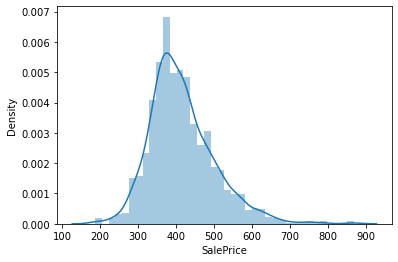

In [25]:
##Checking distribution of the target column SalePrice
sns.distplot(housingdf['SalePrice'])


In [26]:
# Skewness
housingdf['SalePrice'].skew()
#We can see that the distribution plot of the SalePrice column is little right skewed

0.9424943630649673

In [27]:
# Dropping the Id column
housingdf = housingdf.drop('Id', axis=1)
# Splitting data into train and test set with 80:20 ratio
df_train, df_test = train_test_split(housingdf, train_size=0.7, test_size=0.3, random_state=42)
print(df_train.shape)
print(df_test.shape)

(1016, 119)
(436, 119)


In [28]:
# Instantiate the scaler
scaler = MinMaxScaler()
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data into scaler and transform
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
436,0.065068,0.018976,0.000000,0.000000,0.0,0.277397,0.106056,0.091785,0.185956,0.0,0.147702,0.000000,0.0,0.333333,0.0,0.250,0.5,0.333333,0.000000,0.5,0.557042,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.225441,0.632353,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0
1296,0.202055,0.045299,0.126496,0.137491,0.0,0.147260,0.183306,0.182194,0.000000,0.0,0.149586,0.333333,0.0,0.666667,0.0,0.375,0.5,0.333333,0.000000,0.5,0.608473,0.224037,0.038241,0.222826,0.0,0.000000,0.0,0.0,0.303308,0.330882,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
624,0.202055,0.055705,0.246154,0.043763,0.0,0.207620,0.119804,0.155576,0.376755,0.0,0.274303,0.333333,0.0,0.333333,1.0,0.500,0.5,0.500000,0.333333,0.5,0.584231,0.172695,0.000000,0.000000,0.0,0.358537,0.0,0.0,0.321907,0.250000,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
593,0.164384,0.019191,0.145299,0.121368,0.0,0.069777,0.138789,0.117944,0.000000,0.0,0.096835,0.333333,0.0,0.333333,0.0,0.125,0.5,0.166667,0.000000,0.5,0.544235,0.163361,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.274669,0.044118,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
632,0.219178,0.064887,0.178632,0.145641,0.0,0.241438,0.226841,0.247132,0.000000,0.0,0.202901,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.5,0.619386,0.224037,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.147212,0.235294,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [29]:
df_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.00000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,...,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,0.166173,0.056940,0.087815,0.076607,0.030027,0.248812,0.173135,0.190553,0.172185,0.010773,0.224595,0.136155,0.031496,0.525591,0.191929,0.361590,0.524606,0.377871,0.208661,0.442175,0.552579,0.111974,0.088426,0.039306,0.007355,0.037327,0.00468,0.003553,0.337924,0.267680,0.789370,0.147638,0.332677,0.629921,0.192913,0.704724,0.037402,0.098425,0.034449,0.063976,0.053150,0.159449,0.051181,0.051181,0.081693,0.045276,0.034449,0.060039,0.058071,0.853346,...,0.142717,0.151575,0.093504,0.346457,0.132874,0.302165,0.595472,0.090551,0.329724,0.629921,0.091535,0.430118,0.451772,0.080709,0.420276,0.446850,0.134843,0.092520,0.082677,0.661417,0.142717,0.098425,0.284449,0.054134,0.093504,0.299213,0.492126,0.175197,0.295276,0.403543,0.500984,0.271654,0.468504,0.207677,0.599409,0.061024,0.260827,0.053150,0.235236,0.291339,0.420276,0.100394,0.808071,0.070866,0.807087,0.095472,0.361220,0.097441,0.207677,0.062008
std,0.074225,0.058946,0.150632,0.081546,0.108637,0.192053,0.071598,0.087873,0.211436,0.086766,0.098761,0.173027,0.125522,0.183027,0.251251,0.104347,0.110462,0.134925,0.219437,0.186794,0.168007,0.149922,0.122409,0.113095,0.063422,0.133573,0.06141,0.037956,0.125489,0.221594,0.407957,0.354915,0.471404,0.483063,0.394780,0.456391,0.189837,0.298035,0.182469

In [30]:
#Looking at Correlations
# Variables more than 0.70 correlations 
c = df_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                          0
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.976315
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.976315
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.973738
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.973738
HouseStyle_1.5Fin        MSSubClass_50             0.925249
MSSubClass_50            HouseStyle_1.5Fin         0.925249
RoofStyle_Hip            RoofStyle_Gable           0.924602
RoofStyle_Gable          RoofStyle_Hip             0.924602
LotShape_IR1             LotShape_Reg              0.921170
LotShape_Reg             LotShape_IR1              0.921170
ExterQual_TA             ExterQual_Gd              0.915050
ExterQual_Gd             ExterQual_TA              0.915050
FireplaceQu_No Fireplace Fireplaces                0.893208
Fireplaces               FireplaceQu_No Fireplace  0.893208
Exterior2nd_HdBoard      Exterior1st_HdBoard       0.889535
Exterior1st_HdBoard      Exterior2nd_HdB

In [31]:

# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')
# Creating X_train
X_train = df_train
y_train.head()

436     0.225441
1296    0.303308
624     0.321907
593     0.274669
632     0.147212
Name: SalePrice, dtype: float64

In [32]:
X_train.head()
# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
1042,0.044521,0.024982,0.115385,0.159461,0.0,0.173801,0.213748,0.223038,0.000000,0.0,0.183120,0.333333,0.0,0.666667,0.0,0.125,0.5,0.250000,0.333333,0.50,0.663367,0.198366,0.120459,0.000000,0.0,0.0,0.0,0.0,0.375173,0.029412,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1130,0.150685,0.039814,0.000000,0.110206,0.0,0.214041,0.183633,0.228086,0.316223,0.0,0.310286,0.333333,0.0,0.666667,0.0,0.500,0.5,0.416667,0.666667,0.50,0.637343,0.502917,0.084130,0.000000,0.0,0.0,0.0,0.0,0.264784,0.595588,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1003,0.164384,0.062439,0.140171,0.000000,0.0,0.719178,0.274959,0.308857,0.000000,0.0,0.253580,0.000000,0.0,0.666667,0.0,0.500,1.0,0.500000,0.000000,0.50,0.610209,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.268572,0.227941,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
1324,0.184932,0.053171,0.365812,0.000000,0.0,0.768408,0.293781,0.335246,0.000000,0.0,0.275245,0.000000,0.0,0.666667,0.0,0.250,0.5,0.416667,0.333333,0.75,0.794462,0.000000,0.093690,0.000000,0.0,0.0,0.0,0.0,0.288216,0.007353,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
531,0.133562,0.029720,0.000000,0.000000,0.0,0.261558,0.100000,0.095686,0.295884,0.0,0.193670,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.000000,0.50,0.594996,0.000000,0.000000,0.152174,0.0,0.0,0.0,0.0,0.250633,0.647059,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


In [33]:
df_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.00000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.00000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.169882,0.055015,0.090494,0.082273,0.035779,0.228633,0.172041,0.188140,0.158287,0.009110,0.217028,0.152905,0.022936,0.509939,0.188073,0.350917,0.519495,0.373089,0.193425,0.43922,0.548734,0.105970,0.089340,0.040757,0.005337,0.036026,0.001613,0.001115,0.332831,0.274892,0.788991,0.155963,0.330275,0.639908,0.151376,0.756881,0.045872,0.112385,0.034404,0.080275,0.055046,0.144495,0.048165,0.055046,0.068807,0.064220,0.052752,0.050459,0.050459,0.883028,...,0.142202,0.137615,0.107798,0.337156,0.142202,0.316514,0.594037,0.082569,0.334862,0.610092,0.121560,0.451835,0.412844,0.087156,0.424312,0.444954,0.192661,0.089450,0.068807,0.628440,0.172018,0.110092,0.284404,0.043578,0.084862,0.284404,0.536697,0.144495,0.291284,0.389908,0.516055,0.233945,0.481651,0.229358,0.582569,0.057339,0.279817,0.061927,0.25000,0.279817,0.408257,0.126147,0.802752,0.066514,0.857798,0.057339,0.378440,0.103211,0.194954,0.052752
std,0.078317,0.066054,0.164133,0.078576,0.112224,0.181977,0.072031,0.089522,0.210962,0.081645,0.099551,0.172323,0.104723,0.184046,0.251789,0.095483,0.108111,0.136946,0.202280,0.18809,0.177088,0.137625,0.135039,0.104921,0.042211,0.142735,0.033680,0.008384,0.125966,0.224339,0.408494,0.363237,0.470852,0.480578,0.358827,0.429459,0.209447,0.316203,0.182473,0.272031,0.228332,0.351995,0.214361,0.228332,0.253417,0.245426,0.223795,0.219141,0.219141,0.321757,..

In [34]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
# Creating X_test
X_test = df_test

In [35]:
# Retaining the columns of X_train to X_test
# We have to drop the variables, which we dropped in the train set
X_test = X_test[X_train.columns]
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHouse,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
1042,0.044521,0.024982,0.115385,0.159461,0.0,0.173801,0.213748,0.223038,0.000000,0.0,0.183120,0.333333,0.0,0.666667,0.0,0.125,0.5,0.250000,0.333333,0.50,0.663367,0.198366,0.120459,0.000000,0.0,0.0,0.0,0.0,0.029412,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1130,0.150685,0.039814,0.000000,0.110206,0.0,0.214041,0.183633,0.228086,0.316223,0.0,0.310286,0.333333,0.0,0.666667,0.0,0.500,0.5,0.416667,0.666667,0.50,0.637343,0.502917,0.084130,0.000000,0.0,0.0,0.0,0.0,0.595588,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1003,0.164384,0.062439,0.140171,0.000000,0.0,0.719178,0.274959,0.308857,0.000000,0.0,0.253580,0.000000,0.0,0.666667,0.0,0.500,1.0,0.500000,0.000000,0.50,0.610209,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227941,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
1324,0.184932,0.053171,0.365812,0.000000,0.0,0.768408,0.293781,0.335246,0.000000,0.0,0.275245,0.000000,0.0,0.666667,0.0,0.250,0.5,0.416667,0.333333,0.75,0.794462,0.000000,0.093690,0.000000,0.0,0.0,0.0,0.0,0.007353,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
531,0.133562,0.029720,0.000000,0.000000,0.0,0.261558,0.100000,0.095686,0.295884,0.0,0.193670,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.000000,0.50,0.594996,0.000000,0.000000,0.152174,0.0,0.0,0.0,0.0,0.647059,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


## Ridge Regression

In [36]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0]}

# Instantiate Ridge regression
ridge = Ridge()

In [37]:
# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [38]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head(30)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006806,0.005634,0.002600,4.901880e-04,0.0001,{'alpha': 0.0001},0.815699,0.850571,0.542241,0.868538,0.896274,0.794664,0.128893,23,0.902183,0.892780,0.928108,0.892803,0.886094,0.900394,0.014774
1,0.004007,0.000005,0.002194,3.982567e-04,0.001,{'alpha': 0.001},0.815706,0.850630,0.542403,0.868545,0.896289,0.794715,0.128838,22,0.902183,0.892780,0.928108,0.892803,0.886094,0.900394,0.014774
2,0.004204,0.000399,0.001997,4.834668e-06,0.01,{'alpha': 0.01},0.815773,0.851211,0.544005,0.868610,0.896439,0.795207,0.128295,21,0.902182,0.892778,0.928107,0.892802,0.886092,0.900392,0.014774
3,0.003802,0.000747,0.002199,4.011676e-04,0.05,{'alpha': 0.05},0.816028,0.853501,0.550672,0.868793,0.896999,0.797199,0.126005,20,0.902151,0.892734,0.928086,0.892771,0.886051,0.900358,0.014781
4,0.004801,0.000748,0.002202,4.033805e-04,0.1,{'alpha': 0.1},0.816278,0.855890,0.558299,0.868907,0.897531,0.799381,0.123342,19,0.902075,0.892630,0.928032,0.892696,0.885954,0.900278,0.014797
5,0.004006,0.000627,0.001796,3.987521e-04,0.2,{'alpha': 0.2},0.816635,0.859646,0.571958,0.869004,0.898279,0.803105,0.118499,18,0.901855,0.892341,0.927855,0.892483,0.885686,0.900044,0.014828
6,0.003404,0.000494,0.002001,2.678790e-06,0.3,{'alpha': 0.3},0.816886,0.862517,0.584007,0.869039,0.898795,0.806249,0.114174,17,0.901594,0.891997,0.927605,0.892229,0.885375,0.899760,0.014850
7,0.003997,0.000633,0.002599,4.931108e-04,0.4,{'alpha': 0.4},0.817077,0.864810,0.594775,0.869049,0.899181,0.808979,0.110282,16,0.901318,0.891630,0.927301,0.891956,0.885050,0.899451,0.014858
8,0.003605,0.000492,0.001999,8.374705e-06,0.5,{'alpha': 0.5},0.817229,0.866699,0.604480,0.869046,0.899484,0.811388,0.106761,15,0.901038,0.891255,0.926956,0.891677,0.884722,0.899129,0.014853
9,0.003602,0.000487,0.001801,4.006945e-04,0.6,{'alpha': 0.6},0.817354,0.868290,0.613280,0.869033,0.899729,0.813537,0.103561,14,0.900758,0.890879,0.926581,0.891395,0.884394,0.898801,0.014837


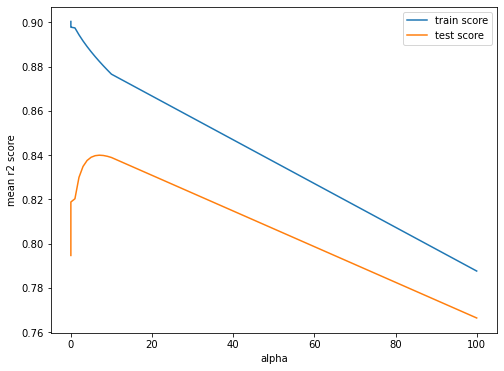

In [39]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [40]:
# Instantiate Ridge regression with alpha=10
model_ridge = Ridge(alpha=10)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [41]:
## Model evaluation Ridge Regression
## Model performance on the train set
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8754074992627734


In [42]:
## Model performance on the test set
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8587679649562701


In [43]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 0.16),
 ('LotFrontage', -0.001),
 ('LotArea', 0.021),
 ('MasVnrArea', 0.04),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.024),
 ('TotalBsmtSF', 0.033),
 ('1stFlrSF', 0.058),
 ('2ndFlrSF', 0.063),
 ('LowQualFinSF', 0.007),
 ('GrLivArea', 0.073),
 ('BsmtFullBath', 0.033),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.051),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.019),
 ('KitchenAbvGr', -0.019),
 ('TotRmsAbvGrd', 0.057),
 ('Fireplaces', 0.031),
 ('GarageCars', 0.058),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.027),
 ('OpenPorchSF', 0.016),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.01),
 ('ScreenPorch', 0.027),
 ('PoolArea', 0.007),
 ('MiscVal', -0.003),
 ('AgeHouse', -0.02),
 ('MSZoning_RL', 0.017),
 ('MSZoning_RM', -0.006),
 ('LotShape_IR1', -0.005),
 ('LotShape_Reg', -0.01),
 ('LotConfig_Corner', -0.005),
 ('LotConfig_Inside', -0.01),
 ('Neighborhood_BrkSide', 0.01),
 ('Neighborhood_CollgCr', -0.01),
 ('Neighborhood_Crawfor', 0.036),
 ('Neighborhood_Edwar

In [44]:
#Top 10 features of Ridge regression
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
0,constant,0.160
11,GrLivArea,0.073
9,2ndFlrSF,0.063
8,1stFlrSF,0.058
20,GarageCars,0.058
18,TotRmsAbvGrd,0.057
82,BsmtQual_Ex,0.051
14,FullBath,0.051
3,MasVnrArea,0.040
38,Neighborhood_Crawfor,0.036


## Lasso Regression

In [45]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2, 5, 10]}
# Instantiate Lasso regression
lasso = Lasso()
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2, 5,
                                   10]},
             return_train_score=True, scoring='r2', verbose=1)

In [46]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068619,0.003140,0.002001,0.000003,0.000001,{'alpha': 1e-06},0.815953,0.851299,0.543630,0.868648,0.896417,0.795190,0.128456,4,0.902181,0.892774,0.928100,0.892799,0.886090,0.900389,0.014773
1,0.063220,0.004123,0.002397,0.000486,0.00001,{'alpha': 1e-05},0.818429,0.856733,0.553495,0.868621,0.897508,0.798957,0.125327,3,0.902023,0.892526,0.928003,0.892606,0.885888,0.900209,0.014817
2,0.019205,0.005155,0.002198,0.000401,0.0001,{'alpha': 0.0001},0.833313,0.880479,0.622814,0.867967,0.900522,0.821019,0.101486,2,0.897395,0.887177,0.923833,0.888140,0.880442,0.895397,0.015209
3,0.004002,0.000003,0.002000,0.000632,0.001,{'alpha': 0.001},0.818746,0.854702,0.757488,0.818239,0.864643,0.822763,0.037607,1,0.846049,0.837629,0.868359,0.841166,0.836650,0.845971,0.011669
4,0.005118,0.001997,0.001994,0.000633,0.01,{'alpha': 0.01},0.485961,0.545286,0.506511,0.495462,0.545022,0.515648,0.024954,5,0.530316,0.520306,0.546616,0.543386,0.515397,0.531204,0.012291
5,0.003001,0.000639,0.002004,0.000007,1.0,{'alpha': 1.0},-0.000194,-0.019405,-0.006074,-0.003360,-0.000409,-0.005888,0.007093,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003997,0.000633,0.001804,0.000405,2,{'alpha': 2},-0.000194,-0.019405,-0.006074,-0.003360,-0.000409,-0.005888,0.007093,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.003001,0.000633,0.001602,0.000486,5,{'alpha': 5},-0.000194,-0.019405,-0.006074,-0.003360,-0.000409,-0.005888,0.007093,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.004201,0.000980,0.001800,0.000749,10,{'alpha': 10},-0.000194,-0.019405,-0.006074,-0.003360,-0.000409,-0.005888,0.007093,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

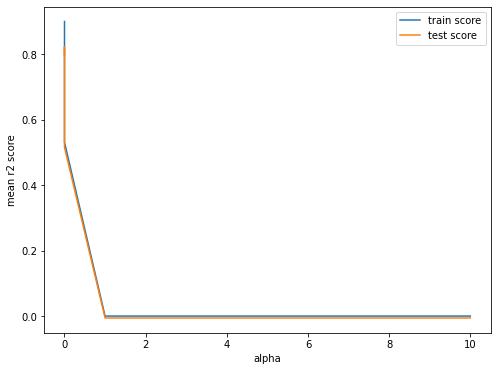

In [48]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Lasso regression with optimal alpha 0.001

In [49]:
## Instantiate Lasso regression with alpha=0.001
model_lasso = Lasso(0.001)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [50]:
# Model performance on the train set
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8432555208853181


In [51]:
#Model performance on the test set
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8337194426845449


In [52]:
### Lasso Regression Model Parameters
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.2),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.018),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.007),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.333),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.02),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.001),
 ('Fireplaces', 0.015),
 ('GarageCars', 0.096),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('AgeHouse', -0.0),
 ('MSZoning_RL', 0.002),
 ('MSZoning_RM', -0.02),
 ('LotShape_IR1', 0.0),
 ('LotShape_Reg', -0.008),
 ('LotConfig_Corner', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.012),
 ('Neighborhood_Edwards', -0.015),
 ('Neighborhood_Gilbert', -

In [53]:
# Feature selected by Lasso regression
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df= (lasso_params_df.sort_values('Coef', ascending=False)).head(11)
lasso_params_df

,Params,Coef
11,GrLivArea,0.333
0,constant,0.200
20,GarageCars,0.096
82,BsmtQual_Ex,0.065
86,BsmtExposure_Gd,0.029
57,OverallQual_8,0.029
43,Neighborhood_NridgHt,0.023
91,BsmtFinType1_GLQ,0.021
14,FullBath,0.020
3,MasVnrArea,0.018
